# Complex Graphics with Seaborn

Throughout this course, we've seen how to use our basic Python skills to create sophisticated data graphics. Some nice developers have created the the Seaborn package, which can automate some of the work for us. Using Seaborn, we can create familiar plots more easily, and create new ones as well. 

Both base Matplotlib and Seaborn graphics are welcome on your projects. Please keep in mind that you must be ready to explain every facet of a plot. So, if you use a fancy Seaborn function to create a complicated visualization and then discuss only some of its facets, you may lose points for showing unnecessary information. 

In [5]:
import pandas as pd

In [6]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Seaborn builds on the foundation of Matplotlib. It includes several simple commands to make very complex visualizations, including ones which would normally require a `for`-loop or use of `apply`.  The cost of all this power is that it is sometimes more difficult to exercise fine-grained control over the details. 

One of the main differences between Seaborn and Matplotlib is that Seaborn accepts the names of dataframe columns for many arguments. 

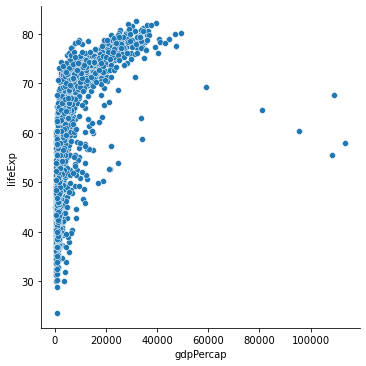

In [7]:
import seaborn as sns
#relplot relates two different varaibles
sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp")

Looks good. We already got labels, and there is a nice outline around the points, but __what is a facetgrid__?

Now let's color the data by continent. (How would we have done this with Matplotlib?)

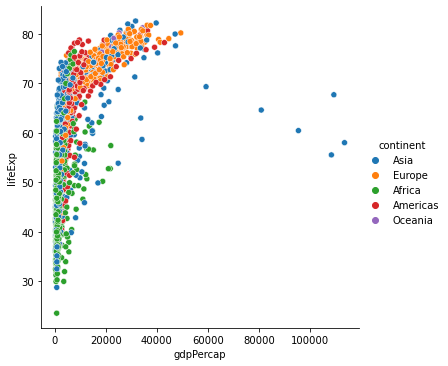

In [8]:
sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

array([[<AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>]], dtype=object)

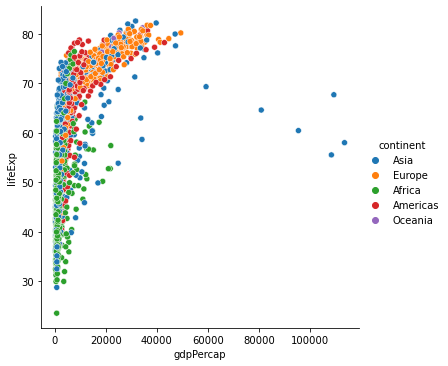

In [9]:
#now lets try to put the x-axis on a log scale
#cant just use ax.semilogx() right away

fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

#fgrid has an axes attribute
fgrid.axes


#fgrid.axes is an array of axes, so we can now use ax.semilogx() if we set ax to the write element of the array

[]

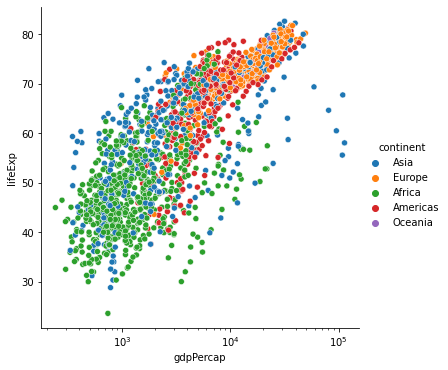

In [10]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

ax=fgrid.axes[0][0]

ax.semilogx()


Add transparancey

[]

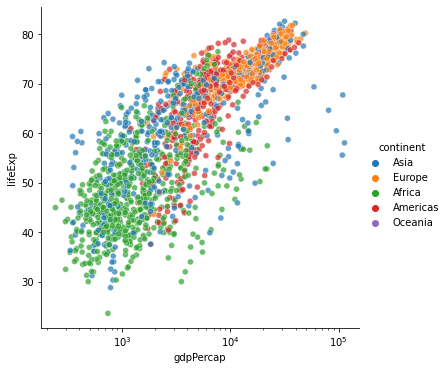

In [11]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=0.7)

ax=fgrid.axes[0][0]

ax.semilogx()


Now, let's group by continents

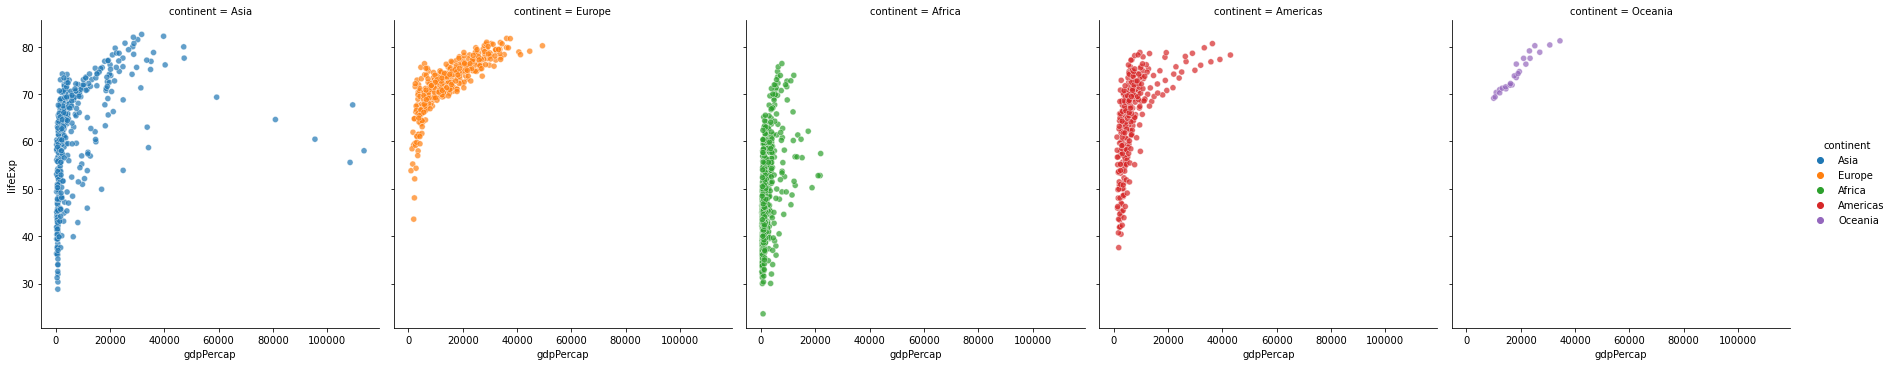

In [12]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="continent")

We lost our log?

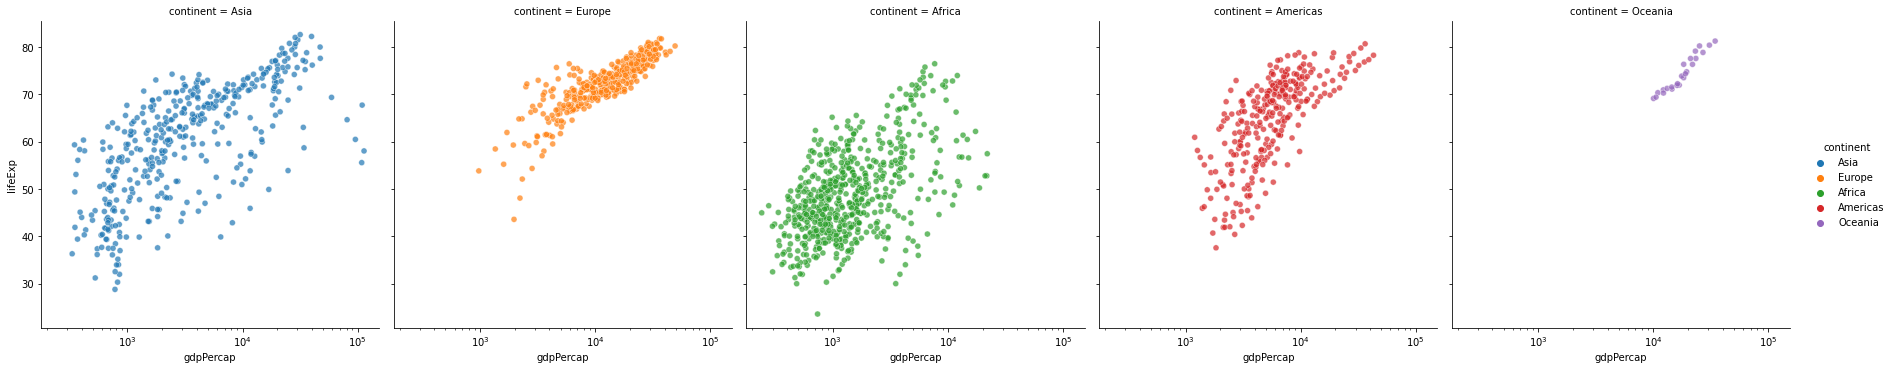

In [13]:
#cols says that columns of the array should correspond to continent
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="continent")

for ax in fgrid.axes.flatten():
    ax.semilogx()

Two rows of plots

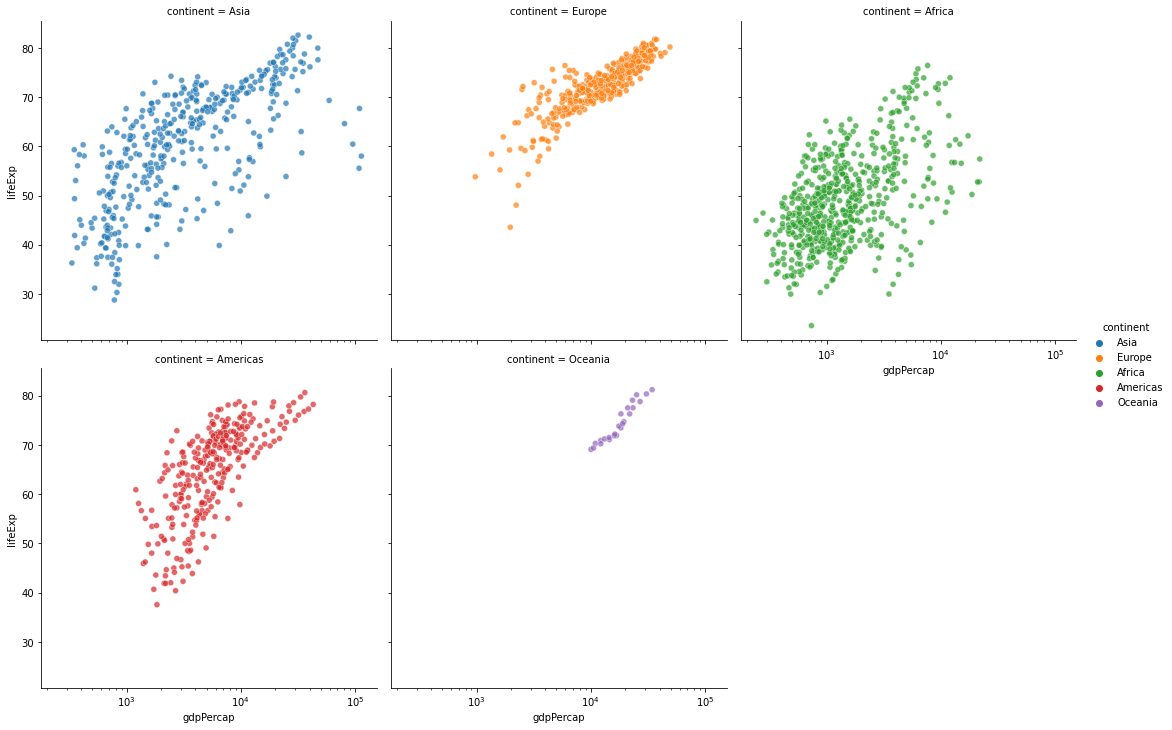

In [14]:
#col_wrap=3 says no more than 3 columns
fgrid=sns.relplot(data=gapminder,
                  x="gdpPercap",
                  y="lifeExp",
                  hue="continent",
                  alpha=.7,
                  col="continent",
                  col_wrap=3)

for ax in fgrid.axes.flatten():
    ax.semilogx()

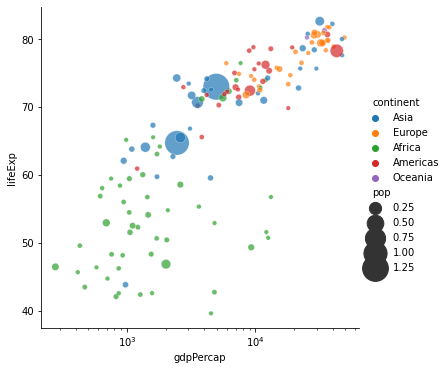

In [15]:
#fancier
#differnet sizes depending on population

sub_gapminder=gapminder[gapminder["year"]==2007]

fgrid=sns.relplot(data=sub_gapminder,
                 x="gdpPercap",
                  y="lifeExp",
                  alpha=.7,
                  size="pop",
                  sizes=(20,700),
                  hue="continent")

for ax in fgrid.axes.flatten():
    ax.semilogx()

## Bar Charts

Can put seaborn plots inside of normal matplot lib figures


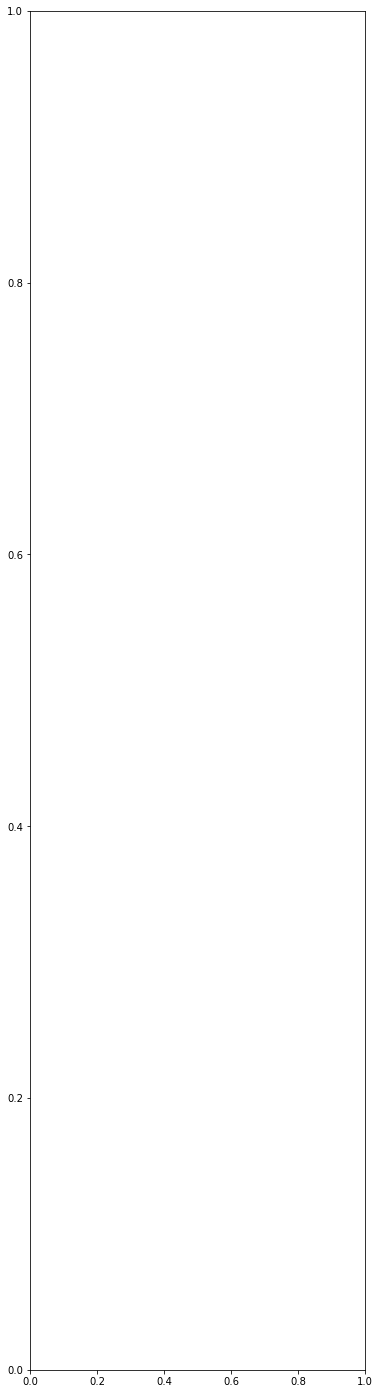

In [16]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(6,25))

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

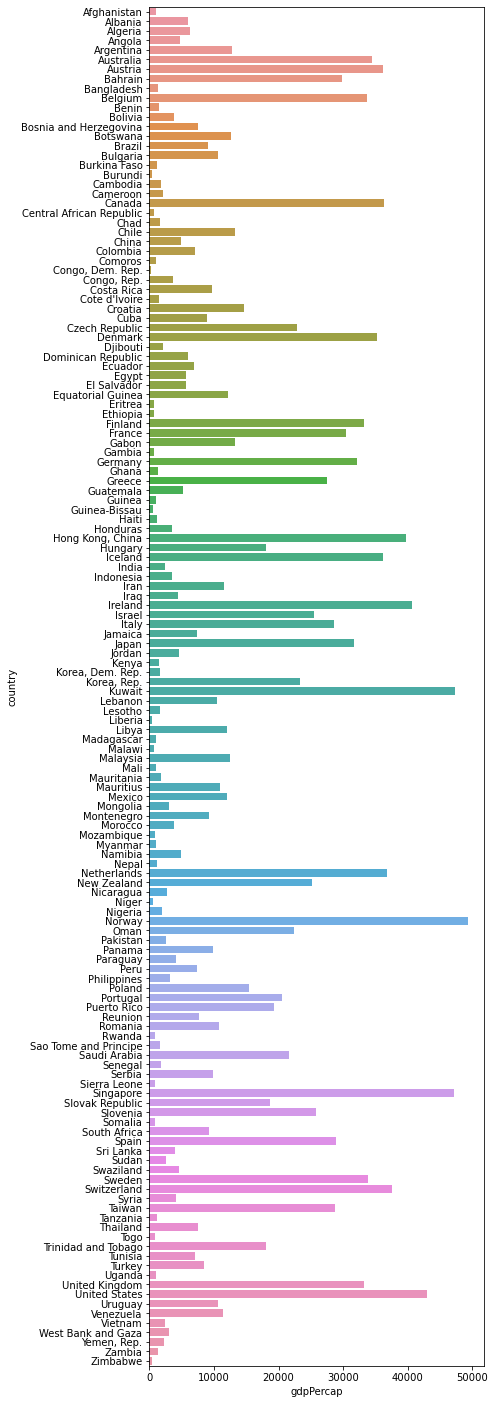

In [17]:

fig,ax=plt.subplots(figsize=(6,25))
df = sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country")

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

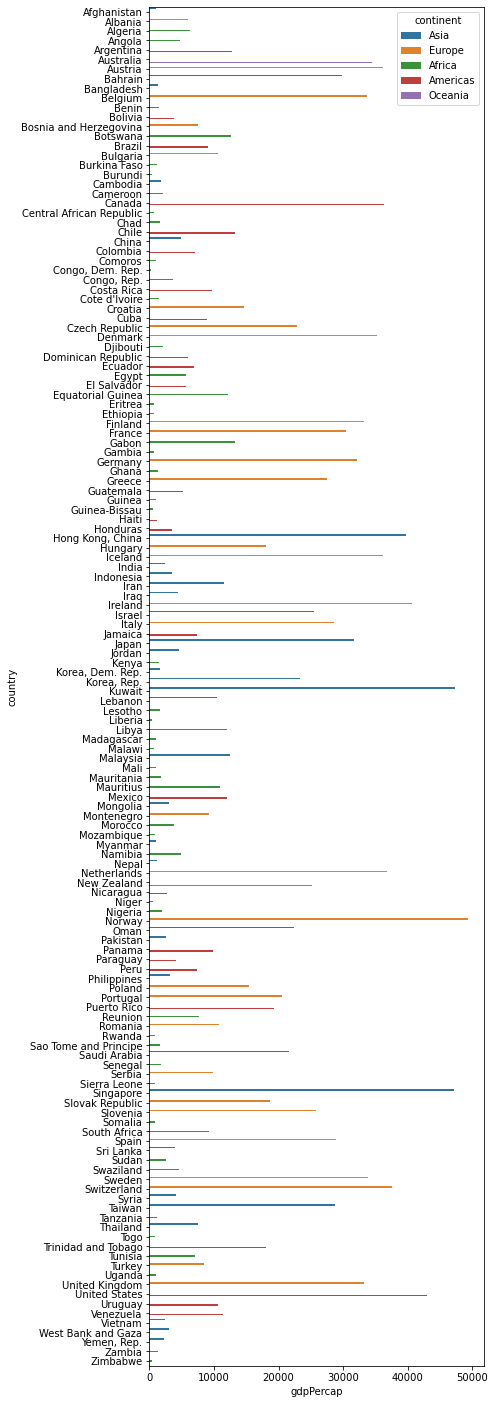

In [18]:
#visualize by contintent
fig,ax=plt.subplots(figsize=(6,25))
df = sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent")

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

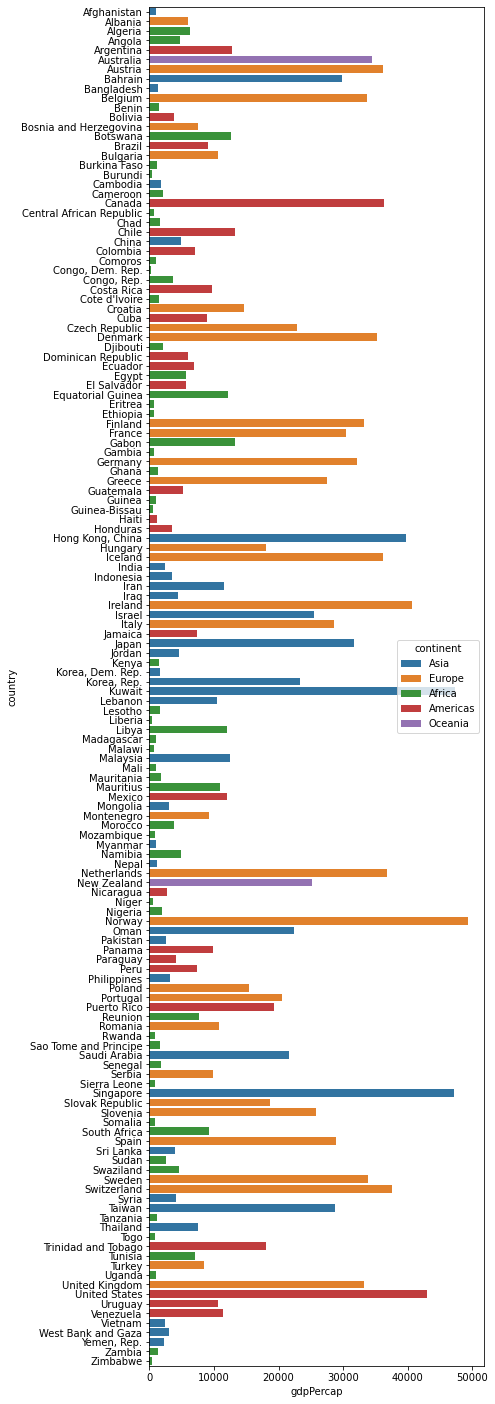

In [19]:
#lines look too small fix this with dodge=False

#visualize by contintent
fig,ax=plt.subplots(figsize=(6,25))
df = sub_gapminder
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent", dodge=False)

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

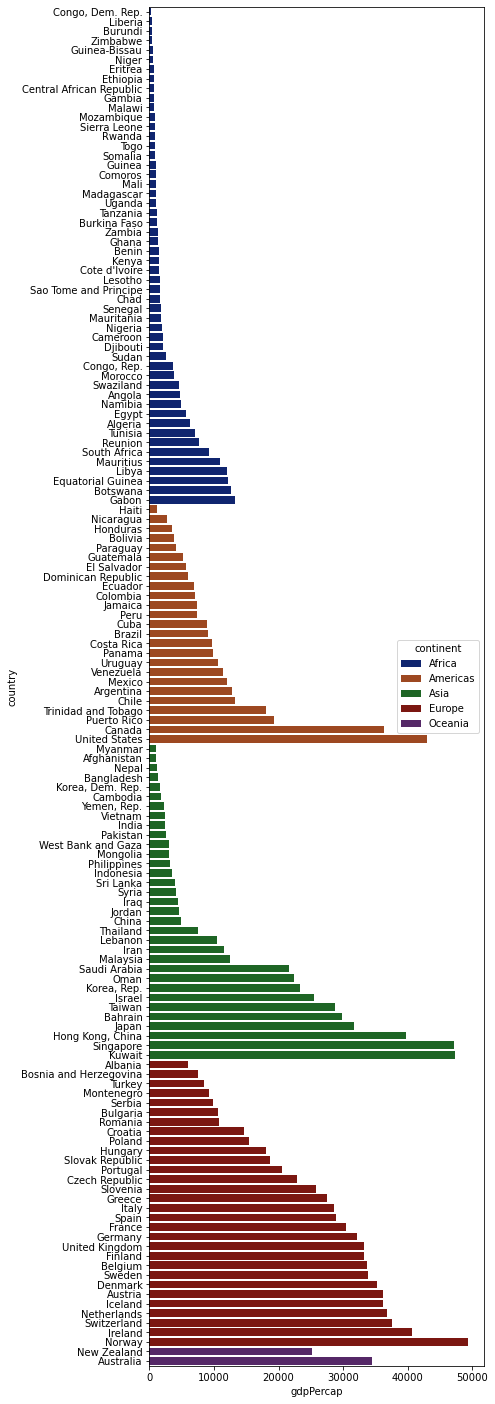

In [20]:
#Group data by continent and make gdp go in ascending order with in a continent
fig,ax=plt.subplots(figsize=(6,25))
df = df.sort_values(["continent","gdpPercap"],ascending=True)
sns.barplot(data=df,x="gdpPercap",y="country",hue="continent",dodge=False,palette="dark")
#pallete=dark makes your graph less bright

# Pairplots

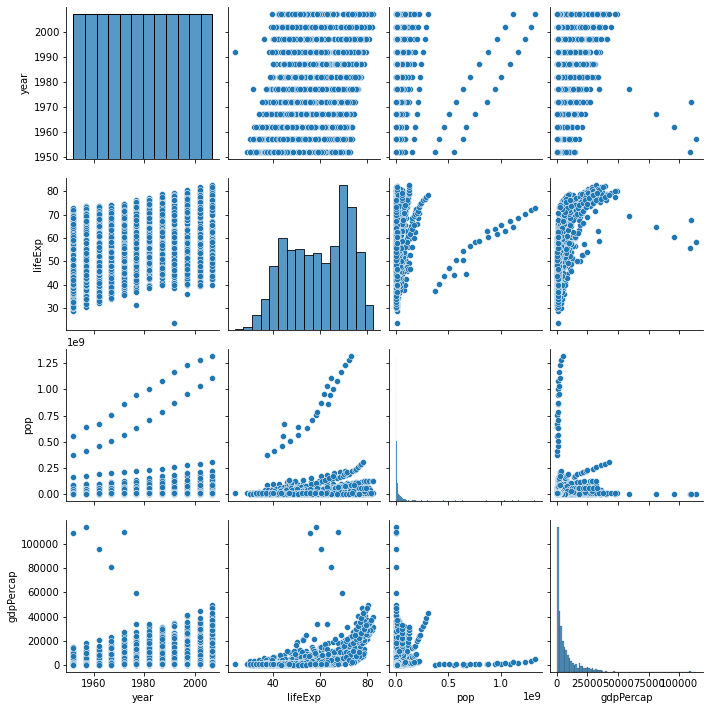

In [22]:
sns.pairplot(gapminder)

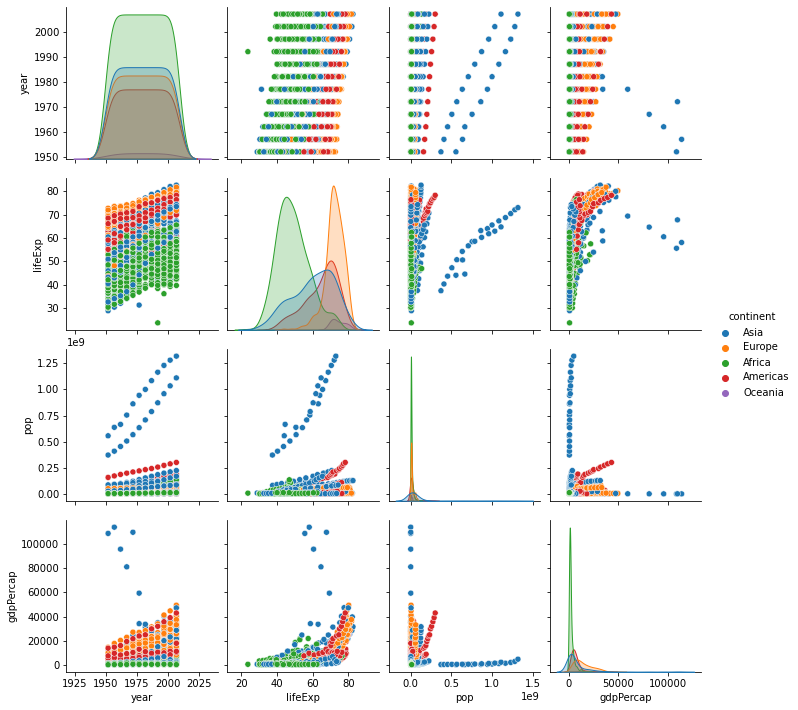

In [25]:
fgrid=sns.pairplot(gapminder,hue="continent")

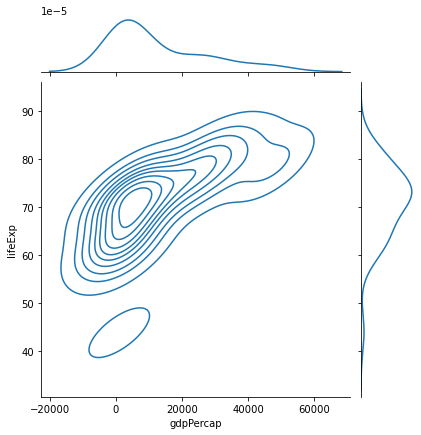

In [26]:
#joint plots
ix=(gapminder["continent"]=="Asia") & (gapminder["year"]==2007)
subset = gapminder[ix]

sns.jointplot(data=subset, x= "gdpPercap",y="lifeExp",kind="kde")

Many more examples available here https://seaborn.pydata.org/examples/index.html